# Employee Attrition Prediction

**Student:** Amruta Kumbar  
**Roll Number:** AA.SC.P2MCA24074031  
**Course:** MCA Minor Project (21CSA697A)  
**Date:** February 2026

This notebook contains the complete code for Employee Attrition Prediction using Machine Learning and Explainable AI.

---

## Table of Contents

1. [Import Libraries](#1-import-libraries)
2. [Load Dataset](#2-load-dataset)
3. [Data Exploration](#3-data-exploration)
4. [Data Preprocessing](#4-data-preprocessing)
5. [Feature Engineering](#5-feature-engineering)
6. [Train-Test Split](#6-train-test-split)
7. [Model Training](#7-model-training)
8. [Model Evaluation](#8-model-evaluation)
9. [SHAP Explainability](#9-shap-explainability)
10. [Visualization](#10-visualization)
11. [Save Model](#11-save-model)
12. [Make Predictions](#12-make-predictions)

---

## 1. Import Libraries

In [51]:
# ==========================================
# STEP 1: IMPORT ALL REQUIRED LIBRARIES
# ==========================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

# XGBoost
import xgboost as xgb

# SHAP for explainability
import shap

# Utilities
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

## 2. Load Dataset

In [52]:
# ==========================================
# STEP 2: LOAD THE DATASET
# ==========================================

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("="*50)
print("DATASET LOADED SUCCESSFULLY")
print("="*50)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
df.head()

DATASET LOADED SUCCESSFULLY

Shape: 1470 rows × 35 columns

First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---

## 3. Data Exploration

In [53]:
# ==========================================
# STEP 3: EXPLORE THE DATA
# ==========================================

print("="*50)
print("DATA EXPLORATION")
print("="*50)

# Column names
print(f"\nColumns ({len(df.columns)}):")
print(list(df.columns))

# Data types
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

# Duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

DATA EXPLORATION

Columns (35):
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Data Types:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber       


TARGET VARIABLE (ATTRITION) DISTRIBUTION

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Rate: 16.1%


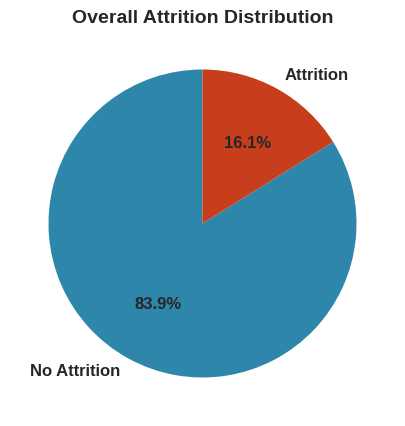

In [54]:
# Check target variable distribution
print("\n" + "="*50)
print("TARGET VARIABLE (ATTRITION) DISTRIBUTION")
print("="*50)

attrition_counts = df['Attrition'].value_counts()
print(f"\n{attrition_counts}")
print(f"\nAttrition Rate: {attrition_counts['Yes'] / len(df) * 100:.1f}%")

# Plot
plt.figure(figsize=(8, 5))
colors = ['#2E86AB', '#C73E1D']
plt.pie(attrition_counts, labels=['No Attrition', 'Attrition'],
        autopct='%1.1f%%', colors=colors, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Overall Attrition Distribution', fontsize=14, fontweight='bold')
plt.show()

---

## 4. Data Preprocessing

In [55]:
# ==========================================
# STEP 4: DATA PREPROCESSING
# ==========================================

print("="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy for preprocessing
df_processed = df.copy()

# 4.1: Encode target variable (Attrition)
df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})
print("\n1. Target variable encoded: Yes=1, No=0")

# 4.2: Remove unnecessary columns
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')
print(f"2. Dropped columns: {columns_to_drop}")

# 4.3: Encode categorical variables
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

print(f"3. Encoded {len(categorical_cols)} categorical columns")
print(f"   Columns: {categorical_cols}")

print(f"\nProcessed dataset shape: {df_processed.shape}")
df_processed.head()

DATA PREPROCESSING

1. Target variable encoded: Yes=1, No=0
2. Dropped columns: ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
3. Encoded 7 categorical columns
   Columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Processed dataset shape: (1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


---

## 5. Feature Engineering

In [56]:
# ==========================================
# STEP 5: FEATURE ENGINEERING
# ==========================================

print("="*50)
print("FEATURE ENGINEERING")
print("="*50)

# 5.1: Create derived features

# Average years per company
df_processed['AverageYearsPerCompany'] = df_processed['TotalWorkingYears'] / (
    df_processed['NumCompaniesWorked'] + 1
)

# Years since last promotion ratio
df_processed['YearsSinceLastPromotionRatio'] = df_processed['YearsSinceLastPromotion'] / (
    df_processed['YearsAtCompany'] + 1
)

# Income per year of experience
df_processed['IncomePerYearExperience'] = df_processed['MonthlyIncome'] / (
    df_processed['TotalWorkingYears'] + 1
)

# Age groups
df_processed['AgeGroup'] = pd.cut(
    df_processed['Age'],
    bins=[0, 30, 40, 50, 100],
    labels=[0, 1, 2, 3]
).astype(int)

# Overall satisfaction score
df_processed['OverallSatisfaction'] = (
    df_processed['JobSatisfaction'] +
    df_processed['EnvironmentSatisfaction'] +
    df_processed['WorkLifeBalance']
) / 3

print("Created 5 new features:")
print("  1. AverageYearsPerCompany")
print("  2. YearsSinceLastPromotionRatio")
print("  3. IncomePerYearExperience")
print("  4. AgeGroup")
print("  5. OverallSatisfaction")

print(f"\nFinal dataset shape: {df_processed.shape}")

FEATURE ENGINEERING
Created 5 new features:
  1. AverageYearsPerCompany
  2. YearsSinceLastPromotionRatio
  3. IncomePerYearExperience
  4. AgeGroup
  5. OverallSatisfaction

Final dataset shape: (1470, 36)


---

## 6. Train-Test Split

In [57]:
# ==========================================
# STEP 6: SPLIT DATA INTO TRAIN AND TEST
# ==========================================

print("="*50)
print("TRAIN-TEST SPLIT")
print("="*50)

# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% train, 20% test
    random_state=42,     # For reproducibility
    stratify=y           # Maintain class distribution
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nFeatures scaled using StandardScaler")
print("\n✅ Data ready for model training!")

TRAIN-TEST SPLIT

Training set: 1176 samples
Test set: 294 samples

Features scaled using StandardScaler

✅ Data ready for model training!


---

## 7. Model Training

In [58]:
# ==========================================
# STEP 7: TRAIN MULTIPLE MODELS
# ==========================================

print("="*50)
print("MODEL TRAINING")
print("="*50)

# Dictionary to store models and results
models = {}
results = {}

# 7.1: Logistic Regression
print("\n1. Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr

# Cross-validation score
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')
results['Logistic Regression'] = {'cv_score': cv_scores.mean()}
print(f"   CV ROC-AUC: {cv_scores.mean():.4f}")

MODEL TRAINING

1. Training Logistic Regression...
   CV ROC-AUC: 0.8042


In [59]:
# 7.2: Decision Tree
print("\n2. Training Decision Tree...")
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    class_weight='balanced'
)
dt.fit(X_train_scaled, y_train)
models['Decision Tree'] = dt

cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='roc_auc')
results['Decision Tree'] = {'cv_score': cv_scores.mean()}
print(f"   CV ROC-AUC: {cv_scores.mean():.4f}")


2. Training Decision Tree...
   CV ROC-AUC: 0.6118


In [32]:
# 7.3: Random Forest
print("\n3. Training Random Forest...")
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)
models['Random Forest'] = rf

cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='roc_auc')
results['Random Forest'] = {'cv_score': cv_scores.mean()}
print(f"   CV ROC-AUC: {cv_scores.mean():.4f}")


3. Training Random Forest...
   CV ROC-AUC: 0.7917


In [33]:
# 7.4: Gradient Boosting
print("\n4. Training Gradient Boosting...")
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)
models['Gradient Boosting'] = gb

cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='roc_auc')
results['Gradient Boosting'] = {'cv_score': cv_scores.mean()}
print(f"   CV ROC-AUC: {cv_scores.mean():.4f}")


4. Training Gradient Boosting...
   CV ROC-AUC: 0.7730


In [34]:
# 7.5: XGBoost (Best Model)
print("\n5. Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)
models['XGBoost'] = xgb_model

cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
results['XGBoost'] = {'cv_score': cv_scores.mean()}
print(f"   CV ROC-AUC: {cv_scores.mean():.4f}")


5. Training XGBoost...
   CV ROC-AUC: 0.8008


In [35]:
# Print training summary
print("\n" + "="*50)
print("TRAINING SUMMARY")
print("="*50)

for name, result in results.items():
    print(f"{name}: {result['cv_score']:.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['cv_score'])
best_model = models[best_model_name]

print(f"\n✅ Best Model: {best_model_name}")
print(f"   CV ROC-AUC: {results[best_model_name]['cv_score']:.4f}")


TRAINING SUMMARY
Logistic Regression: 0.8042
Decision Tree: 0.6118
Random Forest: 0.7917
Gradient Boosting: 0.7730
XGBoost: 0.8008

✅ Best Model: Logistic Regression
   CV ROC-AUC: 0.8042


---

## 8. Model Evaluation

In [36]:
# ==========================================
# STEP 8: EVALUATE ALL MODELS
# ==========================================

print("="*50)
print("MODEL EVALUATION")
print("="*50)

evaluation_results = []

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }

    evaluation_results.append(metrics)

# Create comparison DataFrame
results_df = pd.DataFrame(evaluation_results)

print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

MODEL EVALUATION

Model Performance Comparison:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.748299   0.363636 0.765957  0.493151 0.802998
      Decision Tree  0.785714   0.326087 0.319149  0.322581 0.622104
      Random Forest  0.833333   0.375000 0.063830  0.109091 0.751400
  Gradient Boosting  0.836735   0.476190 0.212766  0.294118 0.750108
            XGBoost  0.857143   0.666667 0.212766  0.322581 0.741752


In [37]:
# Detailed evaluation of best model
print("\n" + "="*50)
print(f"DETAILED EVALUATION: {best_model_name}")
print("="*50)

y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best,
                           target_names=['No Attrition', 'Attrition']))


DETAILED EVALUATION: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.94      0.74      0.83       247
   Attrition       0.36      0.77      0.49        47

    accuracy                           0.75       294
   macro avg       0.65      0.76      0.66       294
weighted avg       0.85      0.75      0.78       294



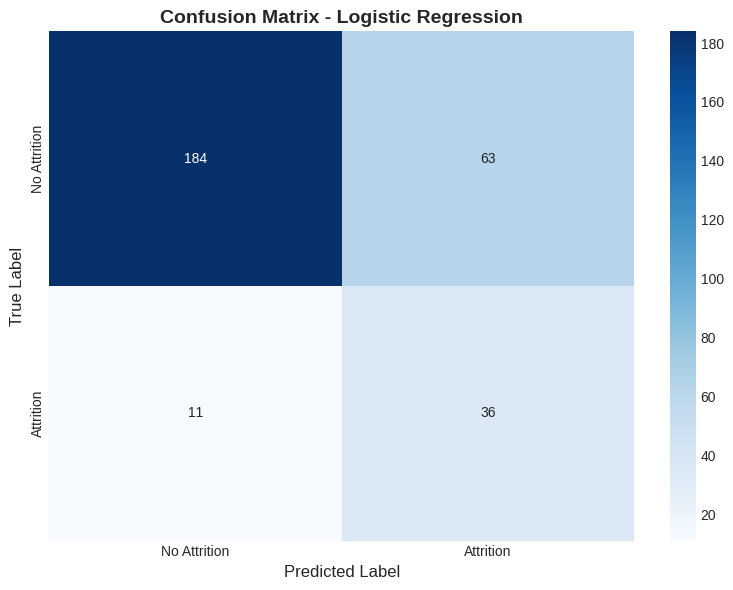


Confusion Matrix:
  True Negatives:  184
  False Positives: 63
  False Negatives: 11
  True Positives:  36


In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Attrition', 'Attrition'],
           yticklabels=['No Attrition', 'Attrition'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(f"  True Negatives:  {cm[0,0]}")
print(f"  False Positives: {cm[0,1]}")
print(f"  False Negatives: {cm[1,0]}")
print(f"  True Positives:  {cm[1,1]}")

---

## 9. SHAP Explainability

In [39]:
# ==========================================
# STEP 9: SHAP EXPLAINABILITY
# ==========================================

print("="*50)
print("SHAP EXPLAINABILITY ANALYSIS")
print("="*50)

import shap

# Initialize SHAP explainer for linear models
explainer = shap.LinearExplainer(best_model, X_train_scaled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# For binary classification, use values for class 1
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print("✅ SHAP values calculated!")

SHAP EXPLAINABILITY ANALYSIS
✅ SHAP values calculated!


In [40]:
# Feature Importance (Mean Absolute SHAP values)
importance = np.abs(shap_values).mean(axis=0)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


Top 10 Most Important Features:
                Feature  Importance
               OverTime    0.651626
          MonthlyIncome    0.505159
YearsSinceLastPromotion    0.475348
                    Age    0.434405
             Department    0.403781
 AverageYearsPerCompany    0.401640
   YearsWithCurrManager    0.350982
         JobInvolvement    0.283521
         YearsAtCompany    0.265264
       DistanceFromHome    0.257136


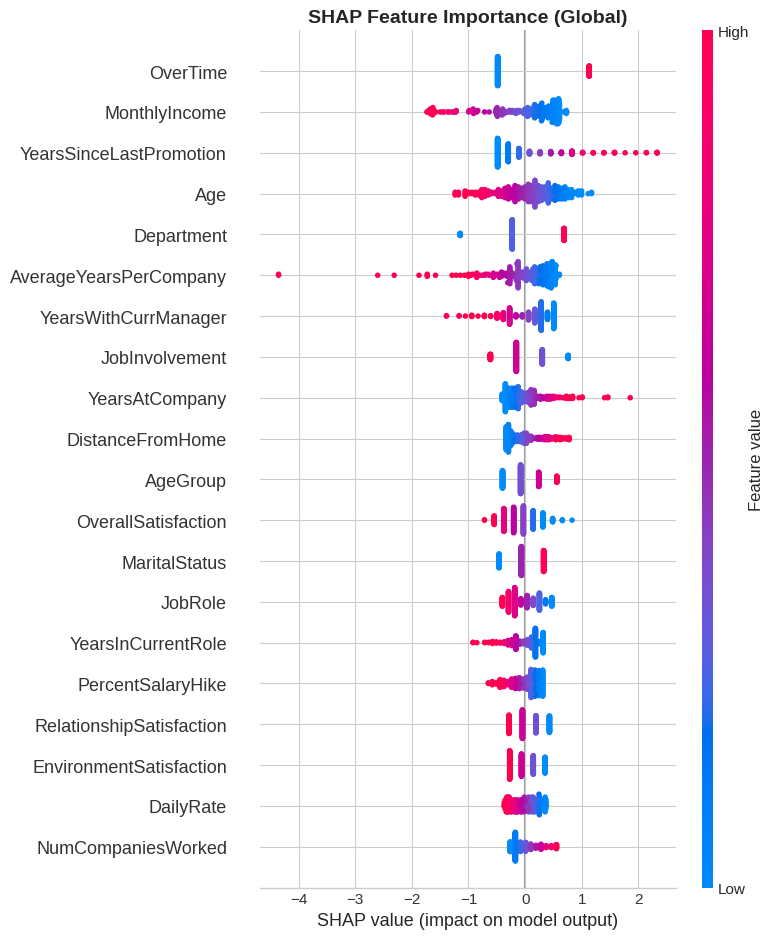

In [41]:
# SHAP Summary Plot (Global Feature Importance)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled, show=False)
plt.title('SHAP Feature Importance (Global)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

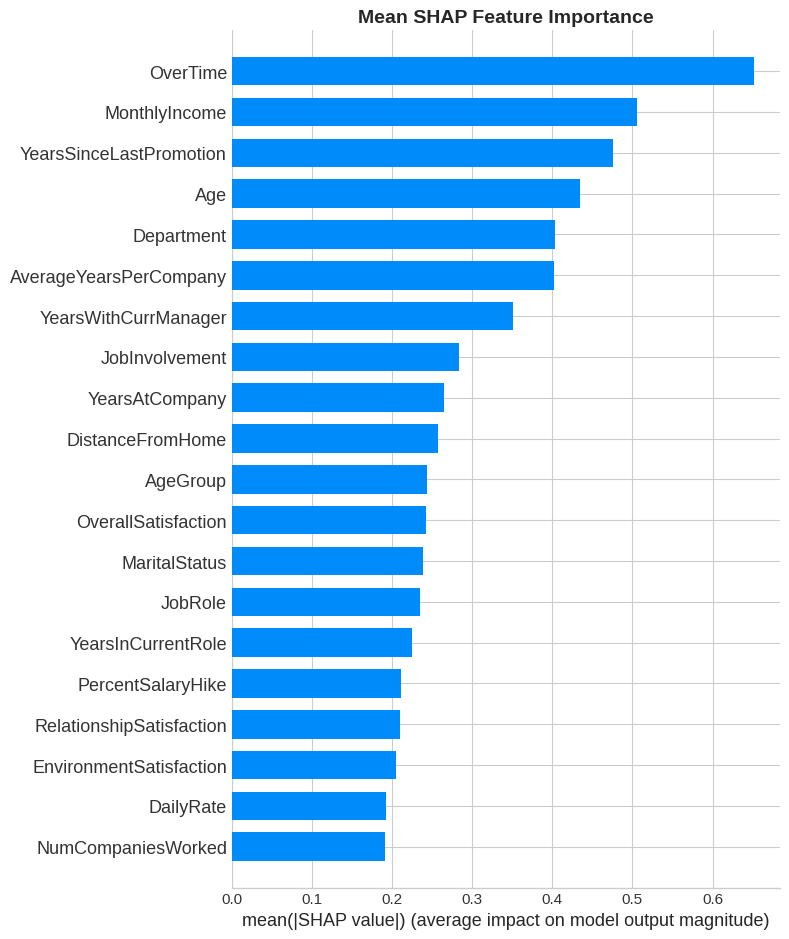

In [42]:
# SHAP Bar Plot (Mean Absolute Importance)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", show=False)
plt.title('Mean SHAP Feature Importance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

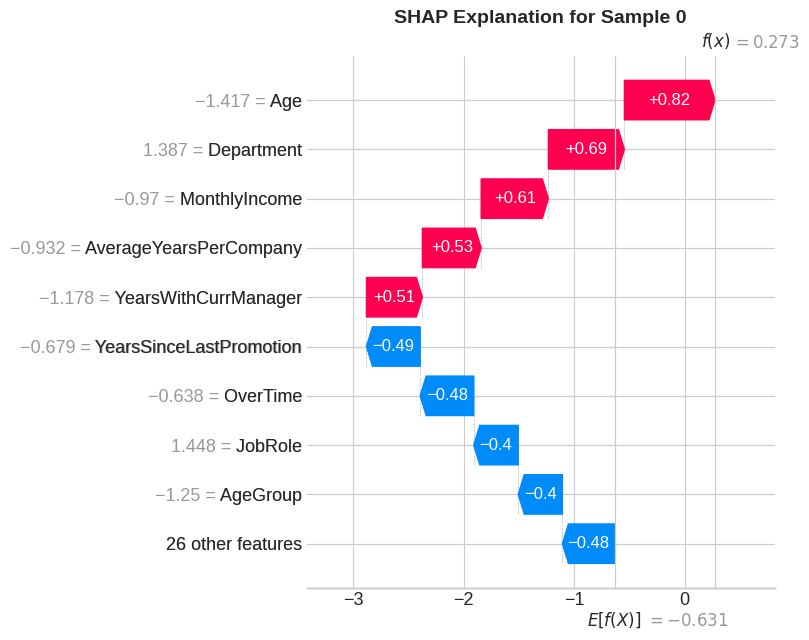


Actual: No Attrition
Predicted: Attrition


In [43]:
# Explain a single prediction (Waterfall Plot)
sample_idx = 0  # Change this to explore different samples

explanation = shap.Explanation(
    values=shap_values[sample_idx],
    base_values=explainer.expected_value,
    data=X_test_scaled.iloc[sample_idx],
    feature_names=X.columns
)

plt.figure(figsize=(12, 8))
shap.waterfall_plot(explanation, show=False)
plt.title(f'SHAP Explanation for Sample {sample_idx}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

actual = y_test.iloc[sample_idx]
predicted = y_pred_best[sample_idx]
print(f"\nActual: {'Attrition' if actual == 1 else 'No Attrition'}")
print(f"Predicted: {'Attrition' if predicted == 1 else 'No Attrition'}")

---

## 10. Visualization

CREATING VISUALIZATIONS


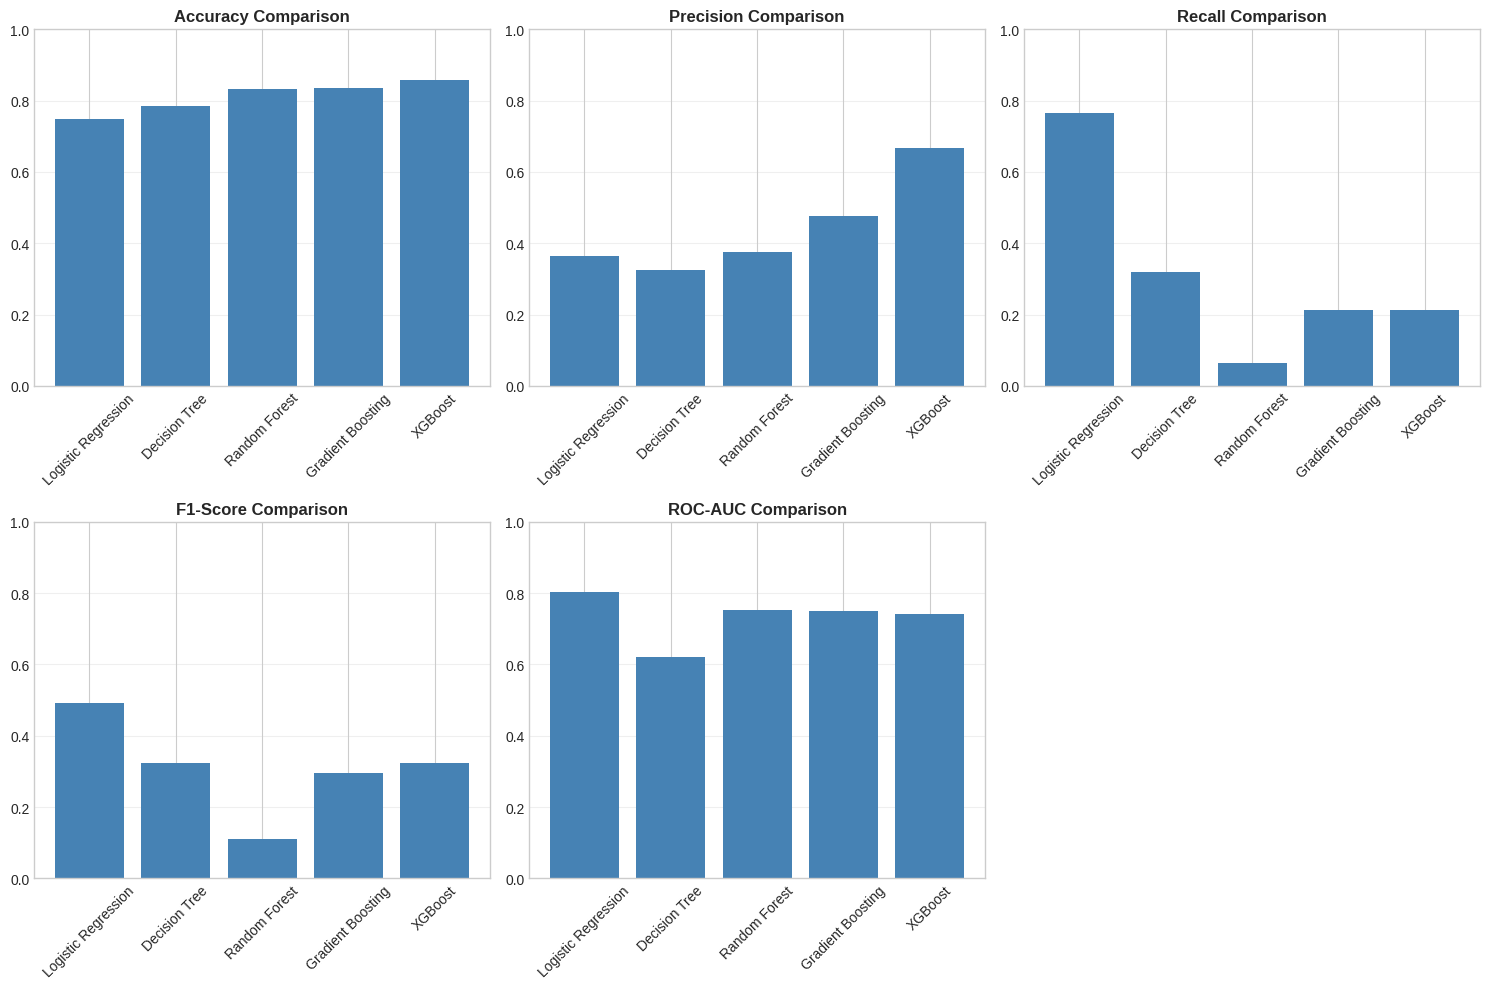

In [44]:
# ==========================================
# STEP 10: CREATE VISUALIZATIONS
# ==========================================

print("="*50)
print("CREATING VISUALIZATIONS")
print("="*50)

# 10.1: Model Performance Comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color='steelblue')
    axes[i].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[i].set_ylim([0, 1])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

axes[5].axis('off')
plt.tight_layout()
plt.show()

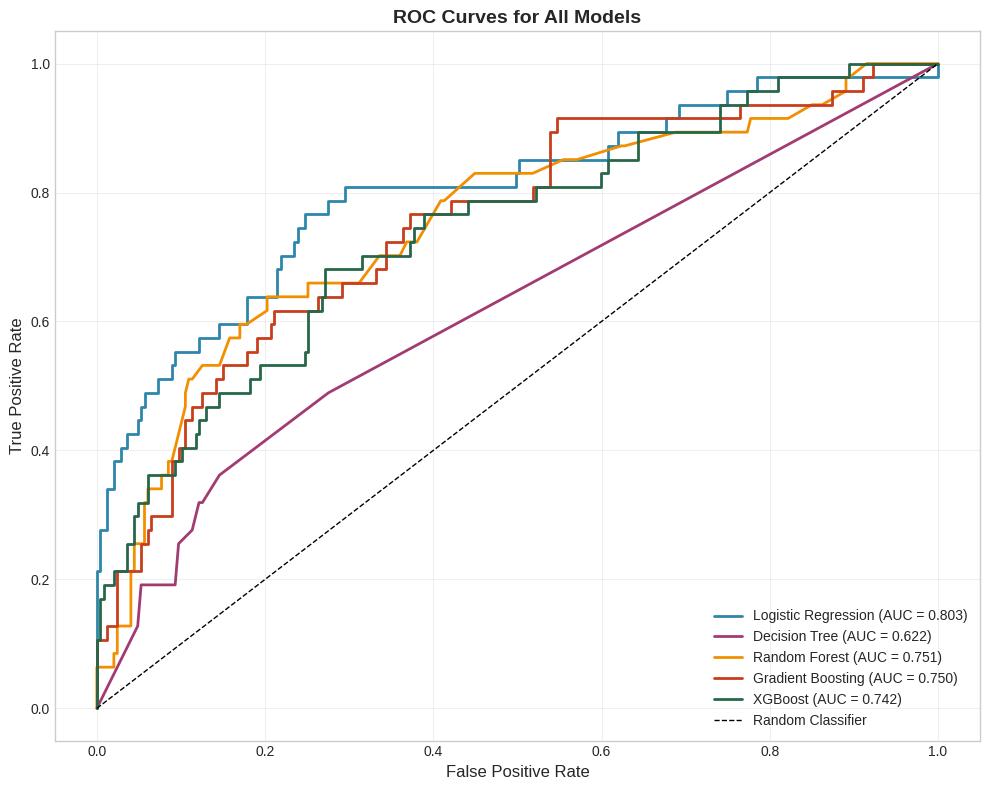

In [45]:
# 10.2: ROC Curves for All Models
plt.figure(figsize=(10, 8))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#276749']

for i, (name, model) in enumerate(models.items()):
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc:.3f})', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

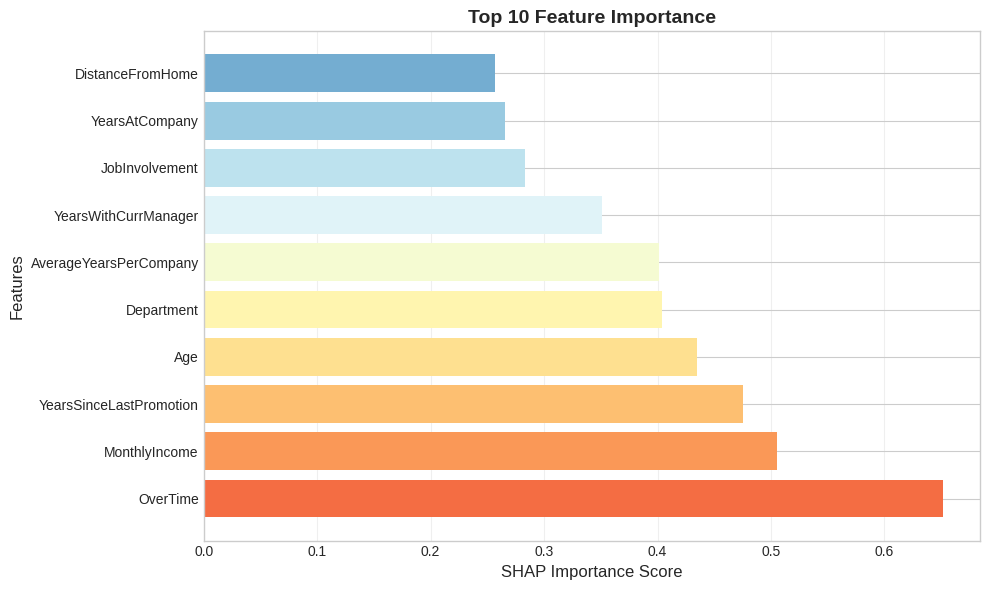

In [46]:
# 10.3: Feature Importance Bar Chart
plt.figure(figsize=(10, 6))

top_features = feature_importance.head(10)
colors = plt.cm.RdYlBu(np.linspace(0.2, 0.8, len(top_features)))

plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('SHAP Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

---

## 11. Save Model

In [47]:
# ==========================================
# STEP 11: SAVE MODEL AND PREPROCESSOR
# ==========================================

import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save best model
with open('models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save label encoders
with open('models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save feature columns
with open('models/feature_columns.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

print("="*50)
print("MODELS SAVED SUCCESSFULLY")
print("="*50)
print("\nSaved files:")
print("  - models/xgboost_model.pkl")
print("  - models/scaler.pkl")
print("  - models/label_encoders.pkl")
print("  - models/feature_columns.pkl")

MODELS SAVED SUCCESSFULLY

Saved files:
  - models/xgboost_model.pkl
  - models/scaler.pkl
  - models/label_encoders.pkl
  - models/feature_columns.pkl


---

## 12. Make Predictions

In [48]:
# ==========================================
# STEP 12: MAKE PREDICTIONS ON NEW DATA
# ==========================================

print("="*50)
print("MAKING PREDICTIONS")
print("="*50)

# Function to predict attrition for a single employee
def predict_attrition(employee_data):
    """
    Predict attrition for a single employee.

    Parameters:
    -----------
    employee_data : dict
        Dictionary containing employee features

    Returns:
    --------
    dict
        Prediction result with probability
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([employee_data])

    # Ensure all required columns are present
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns
    input_df = input_df[X.columns]

    # Scale features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = best_model.predict(input_scaled)[0]
    probability = best_model.predict_proba(input_scaled)[0]

    return {
        'prediction': 'Attrition' if prediction == 1 else 'No Attrition',
        'attrition_probability': probability[1],
        'retention_probability': probability[0]
    }

# Example: Predict for a sample employee
sample_employee = {
    'Age': 30,
    'BusinessTravel': 2,  # Travel_Frequently
    'DailyRate': 800,
    'Department': 2,  # Sales
    'DistanceFromHome': 10,
    'Education': 3,  # Bachelor
    'EducationField': 1,  # Life Sciences
    'EnvironmentSatisfaction': 2,
    'Gender': 0,  # Female
    'HourlyRate': 50,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 0,  # Sales Executive
    'JobSatisfaction': 2,
    'MaritalStatus': 0,  # Single
    'MonthlyIncome': 3000,
    'MonthlyRate': 10000,
    'NumCompaniesWorked': 1,
    'OverTime': 1,  # Yes
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 5,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 3,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2,
    # Derived features
    'AverageYearsPerCompany': 5 / (1 + 1),
    'YearsSinceLastPromotionRatio': 1 / (3 + 1),
    'IncomePerYearExperience': 3000 / (5 + 1),
    'AgeGroup': 0,  # < 30
    'OverallSatisfaction': (2 + 2 + 2) / 3
}

result = predict_attrition(sample_employee)

print("\nPrediction Result:")
print(f"  Prediction: {result['prediction']}")
print(f"  Attrition Probability: {result['attrition_probability']:.1%}")
print(f"  Retention Probability: {result['retention_probability']:.1%}")

MAKING PREDICTIONS

Prediction Result:
  Prediction: Attrition
  Attrition Probability: 90.0%
  Retention Probability: 10.0%


In [49]:
# Batch prediction example
print("\n" + "="*50)
print("BATCH PREDICTION EXAMPLE")
print("="*50)

# Predict for first 10 test samples
batch_predictions = best_model.predict(X_test_scaled.head(10))
batch_probabilities = best_model.predict_proba(X_test_scaled.head(10))

print("\nFirst 10 Test Samples:")
for i in range(10):
    actual = 'Attrition' if y_test.iloc[i] == 1 else 'No Attrition'
    predicted = 'Attrition' if batch_predictions[i] == 1 else 'No Attrition'
    prob = batch_probabilities[i][1]
    match = "✓" if actual == predicted else "✗"
    print(f"  Sample {i+1}: Actual={actual}, Predicted={predicted} ({prob:.1%}) {match}")


BATCH PREDICTION EXAMPLE

First 10 Test Samples:
  Sample 1: Actual=No Attrition, Predicted=Attrition (56.8%) ✗
  Sample 2: Actual=No Attrition, Predicted=No Attrition (4.9%) ✓
  Sample 3: Actual=No Attrition, Predicted=Attrition (52.9%) ✗
  Sample 4: Actual=No Attrition, Predicted=No Attrition (1.7%) ✓
  Sample 5: Actual=Attrition, Predicted=Attrition (84.3%) ✓
  Sample 6: Actual=No Attrition, Predicted=Attrition (57.9%) ✗
  Sample 7: Actual=No Attrition, Predicted=No Attrition (13.2%) ✓
  Sample 8: Actual=No Attrition, Predicted=No Attrition (10.1%) ✓
  Sample 9: Actual=No Attrition, Predicted=No Attrition (5.4%) ✓
  Sample 10: Actual=No Attrition, Predicted=Attrition (80.3%) ✗
